## **DATA IMPORT & SUMMARY EDA**

In [57]:
import pandas as pd

# File paths in Colab
bows_file_path = '/content/bows_df.csv'
courses_file_path = '/content/courses_df.csv'
matrix_file_path = '/content/matrix_df.csv'
users_file_path = '/content/users_df.csv'

# Read the CSV files into DataFrames
bows_df = pd.read_csv(bows_file_path)
courses_df = pd.read_csv(courses_file_path)
matrix_df = pd.read_csv(matrix_file_path)
users_df = pd.read_csv(users_file_path)

# Print the head of each DataFrame
print("Head of bows_df:")
print(bows_df.head())
print()

print("Summary of bows_df:")
print(bows_df.info())
print()

print("Head of courses_df:")
print(courses_df.head())
print()

print("Summary of courses_df:")
print(courses_df.info())
print()

print("Head of matrix_df:")
print(matrix_df.head())
print()

print("Summary of matrix_df:")
print(matrix_df.info())
print()

print("Head of users_df:")
print(users_df.head())
print()

print("Summary of users_df:")
print(users_df.info())
print()


Head of bows_df:
   doc_index    doc_id   token  bow
0          0  ML0201EN      ai    2
1          0  ML0201EN    apps    2
2          0  ML0201EN   build    2
3          0  ML0201EN   cloud    1
4          0  ML0201EN  coming    1

Summary of bows_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10366 entries, 0 to 10365
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   doc_index  10366 non-null  int64 
 1   doc_id     10366 non-null  object
 2   token      10366 non-null  object
 3   bow        10366 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 324.1+ KB
None

Head of courses_df:
    COURSE_ID                                              TITLE  \
0    ML0201EN  robots are coming  build iot apps with watson ...   
1    ML0122EN                accelerating deep learning with gpu   
2  GPXX0ZG0EN  consuming restful services using the reactive ...   
3    RP0105EN         analyzing big data in r using ap

## **LINE-BY-LINE RESULTS**

In [ ]:
def generate_recommendations(users_df, matrix_df, threshold=0.60):
    recommendations = []

    for index, row in users_df.iterrows():
        user_id = row['user']
        course_id = row['COURSE_ID']

        if course_id in matrix_df:
            # Get the similarity scores for the user's course
            similarities = matrix_df[course_id]

            # Filter courses with similarity scores meeting or exceeding the threshold
            recommended_courses = [(course, score) for course, score in similarities.items() if score >= threshold and course != course_id]

            # Convert COURSE_ID from index to actual COURSE_ID
            recommended_courses = [(matrix_df.columns[idx], score) for idx, score in recommended_courses]

            # Append recommendations to the list
            for recommended_course, score in recommended_courses:
                recommendations.append({'user': user_id, 'recommended_course': recommended_course, 'score': score})

    recommendations_df = pd.DataFrame(recommendations)

    # Save recommendations dataframe to CSV
    recommendations_df.to_csv('recommendations.csv', index=False)

    return recommendations_df

# Example usage
recommendations_df = generate_recommendations(users_df, matrix_df)
print(recommendations_df)


## **SAMPLING SCRIPT**

In [84]:
import pandas as pd

# Load the data
users_df = pd.read_csv('/content/users_df.csv')
matrix_df = pd.read_csv('/content/matrix_df.csv')

# Ensure matrix_df is properly indexed by the first column
matrix_df.set_index(matrix_df.columns[0], inplace=True)

# Set pandas display options to ensure full content is shown
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Define the function to find and format recommended courses
def find_recommended_courses(user_course, matrix):
    if user_course in matrix.index:
        similarities = matrix.loc[user_course]
        # Filter courses with similarity >= 0.60 and < 1.0
        recommended_courses = similarities[(similarities >= 0.60) & (similarities < 1.0)]
        # Format the recommendations as "COURSE_ID (score)"
        if not recommended_courses.empty:
            return ", ".join(f"{idx} ({score:.2f})" for idx, score in recommended_courses.items())
    return "None"

# Applying the function to each user in users_df
users_df['Recommended Courses and Scores'] = users_df['COURSE_ID'].apply(
    lambda x: find_recommended_courses(x, matrix_df))

# Select specific users for whom to display results, for example, 52091 and 85625
specific_users = [52091, 85625]
filtered_users = users_df[users_df['user'].isin(specific_users)]

# Print the results for these specific users using to_string() to avoid truncation
print(filtered_users[['user', 'COURSE_ID', 'Recommended Courses and Scores']].to_string())


    user   COURSE_ID                         Recommended Courses and Scores
2  52091  ML0122ENv1  ML0120EN (0.98), ML0120ENv2 (0.98), ML0120ENv3 (0.98)
4  85625      TA0105     TMP0101EN (0.89), BD0151EN (0.63), TA0105EN (0.66)


## **FULL ANALYSIS SCRIPT**

In [85]:
import pandas as pd

# Load the data
users_df = pd.read_csv('/content/users_df.csv')
matrix_df = pd.read_csv('/content/matrix_df.csv')

# Ensure matrix_df is properly indexed by the first column
matrix_df.set_index(matrix_df.columns[0], inplace=True)

# Set pandas display options to ensure full content is shown
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Define the function to find and format recommended courses
def find_recommended_courses(user_course, matrix):
    if user_course in matrix.index:
        similarities = matrix.loc[user_course]
        # Filter courses with similarity >= 0.60 and < 1.0
        recommended_courses = similarities[(similarities >= 0.60) & (similarities < 1.0)]
        # Format the recommendations as "COURSE_ID (score)"
        if not recommended_courses.empty:
            return ", ".join(f"{idx} ({score:.2f})" for idx, score in recommended_courses.items())
    return "None"

# Applying the function to each user in users_df
users_df['Recommended Courses and Scores'] = users_df['COURSE_ID'].apply(
    lambda x: find_recommended_courses(x, matrix_df))

# Save the DataFrame within the Colab environment
results_df = users_df[['user', 'COURSE_ID', 'Recommended Courses and Scores']]

# Optionally, save the results to a CSV file for easier handling outside of Python
results_df.to_csv('/content/recommended_courses_for_all_users.csv', index=False)

# Display the DataFrame in the notebook
results_df


,user,COURSE_ID,Recommended Courses and Scores
0,37465,SC0101EN,None
1,50348,RP0101EN,None
2,52091,ML0122ENv1,"ML0120EN (0.98), ML0120ENv2 (0.98), ML0120ENv3 (0.98)"
3,70434,TMP0105EN,None
4,85625,TA0105,"TMP0101EN (0.89), BD0151EN (0.63), TA0105EN (0.66)"
5,108541,PY0101EN,"excourse22 (0.65), excourse62 (0.65)"
6,109915,WA0101EN,WA0103EN (0.63)
7,134697,RP0103,None
8,142685,TMP0105EN,None
9,149690,TA0105,"TMP0101EN (0.89), BD0151EN (0.63), TA0105EN (0.66)"


## **BAR CHART**

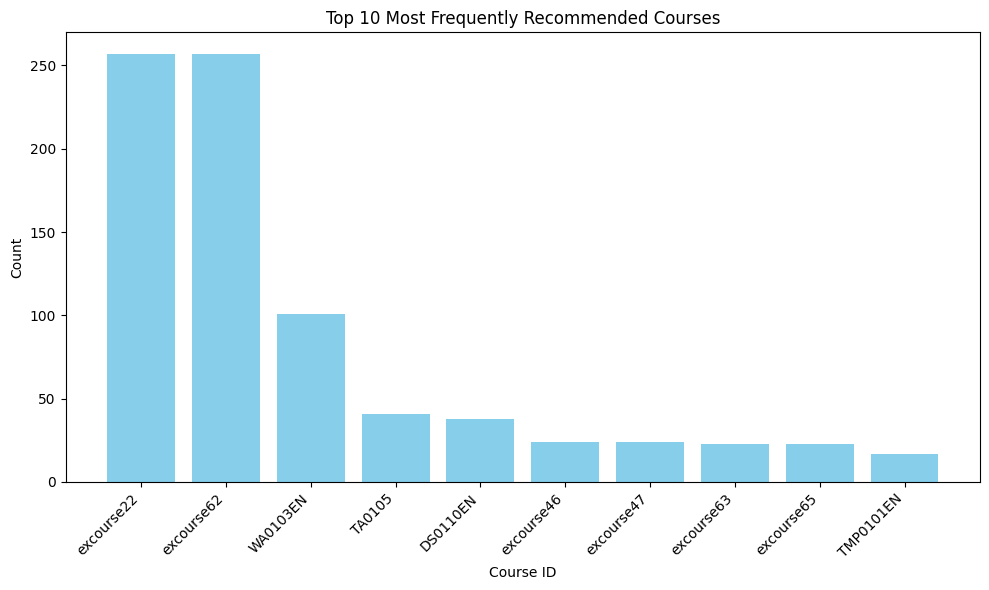

In [87]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

# Load the data
users_df = pd.read_csv('/content/users_df.csv')
matrix_df = pd.read_csv('/content/matrix_df.csv')

# Ensure matrix_df is properly indexed by the first column
matrix_df.set_index(matrix_df.columns[0], inplace=True)

# Set pandas display options to ensure full content is shown
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Define the function to find and format recommended courses
def find_recommended_courses(user_course, matrix):
    if user_course in matrix.index:
        similarities = matrix.loc[user_course]
        # Filter courses with similarity >= 0.60 and < 1.0
        recommended_courses = similarities[(similarities >= 0.60) & (similarities < 1.0)]
        # Format the recommendations as "COURSE_ID (score)"
        if not recommended_courses.empty:
            return ", ".join(f"{idx} ({score:.2f})" for idx, score in recommended_courses.items())
    return "None"

# Applying the function to each user in users_df
users_df['Recommended Courses and Scores'] = users_df['COURSE_ID'].apply(
    lambda x: find_recommended_courses(x, matrix_df))

# Function to extract courses from the recommendations string
def extract_courses(recommendation_str):
    # Use regex to extract course IDs
    return re.findall(r"(\w+) \(\d+\.\d+\)", recommendation_str)

# Extract all courses from the DataFrame
all_courses = []
users_df['Recommended Courses and Scores'].apply(lambda x: all_courses.extend(extract_courses(x)))

# Count the frequency of each course
course_counts = Counter(all_courses)

# Get the top 10 most common courses
top_10_courses = course_counts.most_common(10)

# Convert to DataFrame for better visualization
top_10_df = pd.DataFrame(top_10_courses, columns=['Course_ID', 'Count'])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_df['Course_ID'], top_10_df['Count'], color='skyblue')
plt.xlabel('Course ID')
plt.ylabel('Count')
plt.title('Top 10 Most Frequently Recommended Courses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **HISTOGRAM**

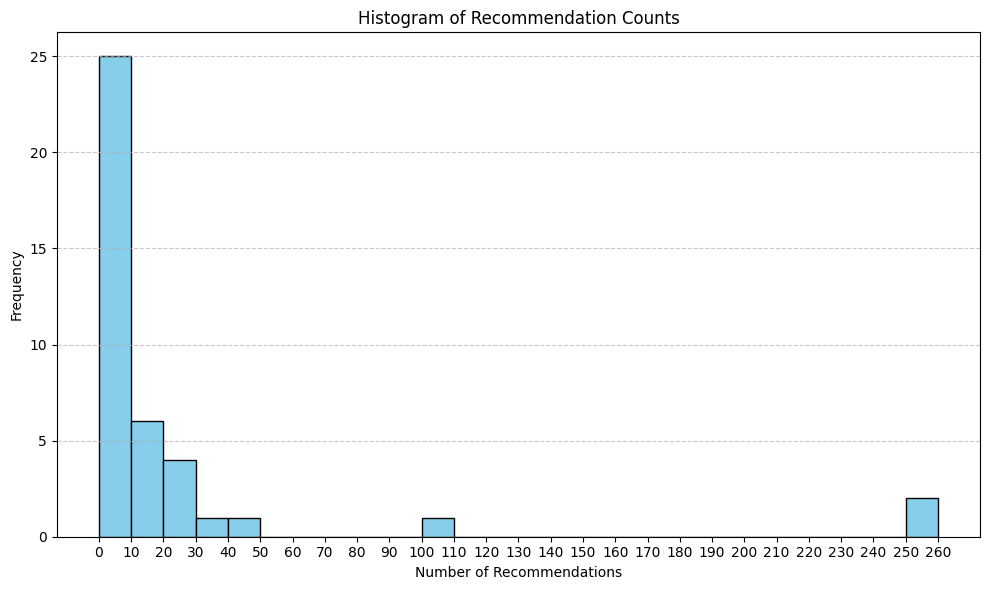

In [88]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the data
users_df = pd.read_csv('/content/users_df.csv')
matrix_df = pd.read_csv('/content/matrix_df.csv')

# Ensure matrix_df is properly indexed by the first column
matrix_df.set_index(matrix_df.columns[0], inplace=True)

# Set pandas display options to ensure full content is shown
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Define the function to find and format recommended courses
def find_recommended_courses(user_course, matrix):
    if user_course in matrix.index:
        similarities = matrix.loc[user_course]
        # Filter courses with similarity >= 0.60 and < 1.0
        recommended_courses = similarities[(similarities >= 0.60) & (similarities < 1.0)]
        # Format the recommendations as "COURSE_ID (score)"
        if not recommended_courses.empty:
            return ", ".join(f"{idx} ({score:.2f})" for idx, score in recommended_courses.items())
    return "None"

# Applying the function to each user in users_df
users_df['Recommended Courses and Scores'] = users_df['COURSE_ID'].apply(
    lambda x: find_recommended_courses(x, matrix_df))

# Function to extract courses from the recommendations string
def extract_courses(recommendation_str):
    # Use regex to extract course IDs
    return re.findall(r"(\w+) \(\d+\.\d+\)", recommendation_str)

# Extract all courses from the DataFrame
all_courses = []
users_df['Recommended Courses and Scores'].apply(lambda x: all_courses.extend(extract_courses(x)))

# Count the frequency of each course
course_counts = pd.Series(all_courses).value_counts()

# Define bin ranges
bins = range(0, course_counts.max() + 11, 10)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(course_counts, bins=bins, color='skyblue', edgecolor='black')
plt.xlabel('Number of Recommendations')
plt.ylabel('Frequency')
plt.title('Histogram of Recommendation Counts')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **PIE CHART**

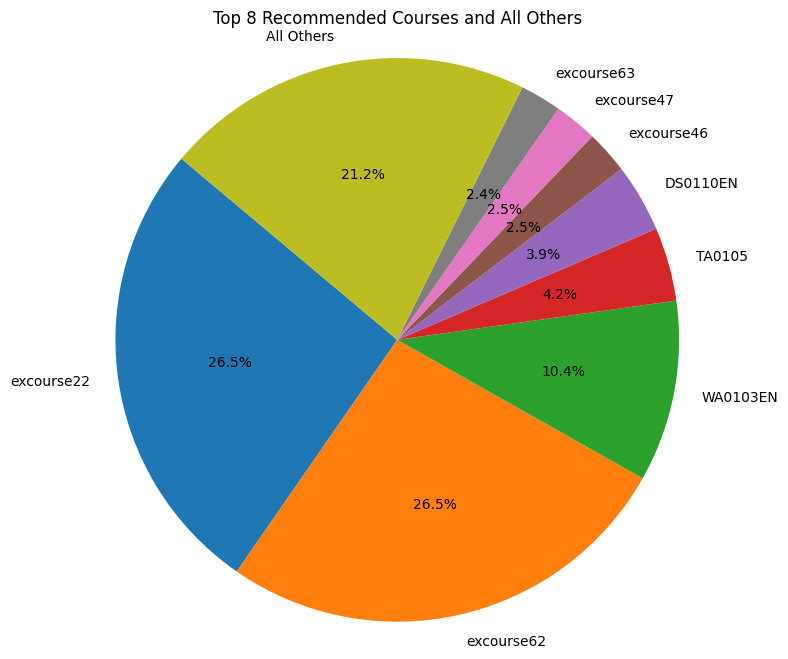

In [95]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

# Load the data
users_df = pd.read_csv('/content/users_df.csv')
matrix_df = pd.read_csv('/content/matrix_df.csv')

# Ensure matrix_df is properly indexed by the first column
matrix_df.set_index(matrix_df.columns[0], inplace=True)

# Set pandas display options to ensure full content is shown
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Define the function to find and format recommended courses
def find_recommended_courses(user_course, matrix):
    if user_course in matrix.index:
        similarities = matrix.loc[user_course]
        # Filter courses with similarity >= 0.60 and < 1.0
        recommended_courses = similarities[(similarities >= 0.60) & (similarities < 1.0)]
        # Format the recommendations as "COURSE_ID (score)"
        if not recommended_courses.empty:
            return ", ".join(f"{idx} ({score:.2f})" for idx, score in recommended_courses.items())
    return "None"

# Applying the function to each user in users_df
users_df['Recommended Courses and Scores'] = users_df['COURSE_ID'].apply(
    lambda x: find_recommended_courses(x, matrix_df))

# Function to extract courses from the recommendations string
def extract_courses(recommendation_str):
    # Use regex to extract course IDs
    return re.findall(r"(\w+) \(\d+\.\d+\)", recommendation_str)

# Extract all courses from the DataFrame
all_courses = []
users_df['Recommended Courses and Scores'].apply(lambda x: all_courses.extend(extract_courses(x)))

# Count the frequency of each course
course_counts = Counter(all_courses)

# Get the top 8 most common courses
top_8_courses = course_counts.most_common(8)

# Create a DataFrame from the top 8 course counts
top_8_df = pd.DataFrame(top_8_courses, columns=['Course_ID', 'Count'])

# Calculate the count of "All Others"
all_others_count = len(all_courses) - top_8_df['Count'].sum()

# Create a DataFrame for the top 8 courses and "All Others"
top_8_and_others_df = pd.concat([top_8_df, pd.DataFrame([['All Others', all_others_count]], columns=['Course_ID', 'Count'])])

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_8_and_others_df['Count'], labels=top_8_and_others_df['Course_ID'], autopct='%1.1f%%', startangle=140)
plt.title('Top 8 Recommended Courses and All Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## **BOX PLOT**

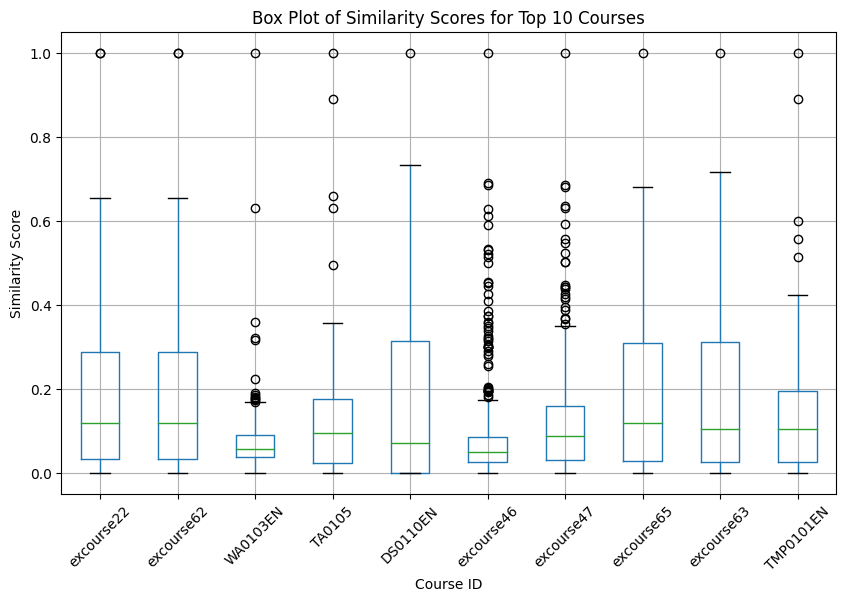

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
matrix_df = pd.read_csv('/content/matrix_df.csv')

# Define the top 10 courses
top_10_courses = ['excourse22', 'excourse62', 'WA0103EN', 'TA0105', 'DS0110EN',
                  'excourse46', 'excourse47', 'excourse65', 'excourse63', 'TMP0101EN']

# Filter the similarity scores data to include only the top 10 courses
top_10_scores = matrix_df[top_10_courses]

# Create box plots for each of the top 10 courses
plt.figure(figsize=(10, 6))
top_10_scores.boxplot()
plt.title('Box Plot of Similarity Scores for Top 10 Courses')
plt.xlabel('Course ID')
plt.ylabel('Similarity Score')
plt.xticks(rotation=45)
plt.show()
